## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [33]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd#data analysis library  well-suited to handling tabular data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# bom.movies_gross
###reading the data from the bom.movies

In [34]:
movie_gross = pd.read_csv("bom.movie_gross.csv")
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [35]:
# a tuple representing the dimensionality  (in `(rows, columns)` ) of the DataFrame.
movie_gross.shape

(3387, 5)

In [36]:
#To get a concise summary of the dataframe
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# data cleaning
we replaced the null values in the column domestic gross with the median value . in column studio, sinceit has categorical values we are going to 

In [56]:
movie_gross.isna().sum()
##want to indentify the missing values in each column

title              0
studio             5
domestic_gross    28
year               0
dtype: int64

In [94]:
mean_value = movie_gross['domestic_gross'].mean()
movie_gross['domestic_gross'].fillna(mean_value, inplace = True)
#trying to

In [87]:
movie_gross.isna().sum()

title             0
studio            5
domestic_gross    0
year              0
dtype: int64

In [92]:
mode_value = movie_gross['studio'].mode()[0]
movie_gross['studio'].fillna(mode_value, inplace = True)

In [93]:
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [57]:
movie_gross.duplicated().value_counts()
#it shows there is no duplicated data

False    3387
dtype: int64

In [38]:
# Access to the column labels of the DataFrame.
movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [72]:
movie_gross.describe()
# returns the data types of all columns in the DataFrame

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [81]:
domestic_gross_g = movie_gross.groupby('studio')["domestic_gross"].sum()
domestic_gross_g.sort_values(ascending = False).head()
#how do i convert this into an interger instead of it being float
#given the data from bom data the studio that had the highest  domestic gross movie were BV,UNI.WB 

studio
BV      1.841903e+10
Uni.    1.290239e+10
WB      1.216805e+10
Fox     1.094950e+10
Sony    8.459683e+09
Name: domestic_gross, dtype: float64

In [ ]:
domestic_gross

In [95]:
movie_gross.isna().sum()
#foreihn has alot of missing values 
# they never made sales or the sata collection was incomplete consider dropping the missing marks
#studio replace with mode 
#replace the missing values with the mean

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [41]:
# dropping a column axis =1 in cloumn dropping
movie_gross.drop("foreign_gross", axis=1, inplace=True)

In [42]:
movie_gross
#focus on selling internationally since foreign gross is graeter

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [97]:
movie_gross.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


In [44]:
movie_gross.shape

(3387, 4)

In [98]:
domestic_g = movie_gross["domestic_gross"].sum()
domestic_g

96596493580.0

In [62]:
movie_gross['studio'].value_counts()

IFC      166
Uni.     147
WB       140
Magn.    136
Fox      136
        ... 
AZ         1
Truly      1
SEG        1
SDS        1
Gaum.      1
Name: studio, Length: 257, dtype: int64

In [66]:
len(movie_gross['studio'].unique())

258

# Data cleaning in tmdb.movies.csv

In [45]:
tmdb_movies_data = pd.read_csv("tmdb.movies.csv", index_col = 0)
tmdb_movies_data

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [99]:
tmdb_movies_data.shape

(26517, 9)

In [100]:
tmdb_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


###missing values

In [101]:
tmdb_movies_data.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [104]:
tmdb_movies_data.duplicated().value_counts()

False    25497
True      1020
dtype: int64

In [109]:
tmdb_movies_data.shape
#initially the shape was 26517 when i dropped the duplicates  and ket the first the shape reduced to 25497

(25497, 9)

In [110]:
tmdb_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [107]:
tmdb_movies_data.drop_duplicates(keep = 'first',inplace = True)

In [108]:
tmdb_movies_data.duplicated().value_counts()

False    25497
dtype: int64

In [105]:
tmdb_movies_data.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [46]:
#corelation btn release data
tmdb_movies_data["original_language"].head(60)
#according standard language code en represents english, nl dutch, therefor the most producing movies are using en .. microsoft shud consider english movies 

0     en
1     en
2     en
3     en
4     en
5     en
6     en
7     en
8     en
9     en
10    en
11    en
12    en
13    en
14    en
15    en
16    en
17    nl
18    en
19    en
20    en
21    en
22    en
23    en
24    en
25    en
26    en
27    en
28    en
29    en
30    en
31    en
32    en
33    en
34    en
35    en
36    en
37    en
38    en
39    en
40    en
41    en
42    en
43    en
44    en
45    en
46    en
47    en
48    en
49    es
50    en
51    en
52    en
53    en
54    en
55    en
56    en
57    en
58    en
59    en
Name: original_language, dtype: object

In [47]:
tmdb_movies_data["original_language"].head(60).unique()# acronym for en , nl , es

array(['en', 'nl', 'es'], dtype=object)

In [48]:
tmdb_movies_data["original_language"].value_counts()
#we have 76 lANGUAGES and their frequency
#en turns to be the most used language for high selling of movies

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
mi        1
hy        1
kk        1
ky        1
xh        1
Name: original_language, Length: 76, dtype: int64

In [116]:
tmdb_movies.groupby(['original_language','original_title','popularity']).sum()

id  vote_average  \
original_language original_title      popularity                         
ab                Bacon & God's Wrath 0.600       355481           7.0   
                  Ghayal Once Again   1.293       381298           6.0   
                  Manson's Lost Girls 1.796       381737           4.8   
                  The Documentary     0.600       262896           9.0   
af                Nommer 37           4.814       502193           5.8   
...                                                  ...           ...   
zh                霰雪                  0.876       310541           8.5   
                  非常幸运                1.400       220488           4.3   
                  風箏                  0.600       585324          10.0   
                  黄飞鸿之英雄有梦            8.813       294993           6.4   
                  龙虾刑警                4.083       527415           0.0   

                                                  vote_count  
original_language original_title      popularity              
ab                Bacon & God's Wrath 0.600                1  
                  Ghayal Once Again   1.293               11  
                  Manson's Lost Girls 1.796                6  
                  The Documentary     0.600                1  
af                Nommer 37           4.814                5  
...                                                      ...  
zh                霰雪                  0.876                1  
                  非常幸运                1.400                9  
                  風箏                  0.600                1  
                  黄飞鸿之英雄有梦            8.813               50  
                  龙虾刑警                4.083                1  

[25439 rows x 3 columns]

In [120]:
mode =tmdb_movies_data['original_language'].mode()[0]
mode

'en'

In [ ]:
tmdb_movies_data.groupby('original lan')

# Data cleaning in rt.movie_info

In [49]:
movie_info = pd.read_csv("rt.movie_info.tsv",delimiter ="\t" )
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [71]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [157]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [160]:
mode_rating = movie_info["rating"].mode()[0]
movie_info("rating").fillna(mode_rating, inplace = True)

TypeError: 'DataFrame' object is not callable

In [162]:
mode_rating = movie_info['rating'].mode()[0]
movie_info['rating'].fillna(mode_rating, inplace = True)

In [163]:
mode_genre = movie_info['genre'].mode()[0]
movie_info['genre'].fillna(mode_genre, inplace = True)

In [164]:
mode_runtime = movie_info['runtime'].mode()[0]
movie_info['runtime'].fillna(mode_runtime, inplace = True)

In [165]:
movie_info['runtime'] = movie_info['runtime'].str.extract(r'(\d+\.?\d*)', expand = False).astype(int)

In [167]:
movie_info_df = movie_info[['rating', 'genre', 'runtime']]
movie_info_df

,rating,genre,runtime
0,R,Action and Adventure|Classics|Drama,104
1,R,Drama|Science Fiction and Fantasy,108
2,R,Drama|Musical and Performing Arts,116
3,R,Drama|Mystery and Suspense,128
4,NR,Drama|Romance,200
...,...,...,...
1555,R,Action and Adventure|Horror|Mystery and Suspense,106
1556,PG,Comedy|Science Fiction and Fantasy,88
1557,G,Classics|Comedy|Drama|Musical and Performing Arts,111
1558,PG,Comedy|Drama|Kids and Family|Sports and Fitness,101


# Data cleaning in tn.movies_budget_csv

In [50]:
movie_budgets = pd.read_csv("tn.movie_budgets.csv")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [67]:
movie_budgets.isna().sum()
#it show there is no missing values or data

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [123]:
movie_budgets.duplicated().value_counts()

False    5782
dtype: int64

In [125]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [126]:
movie_budgets['production_budget'] = movie_bud
how to convert a string to a float in datatype

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [128]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

In [129]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [130]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [131]:
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


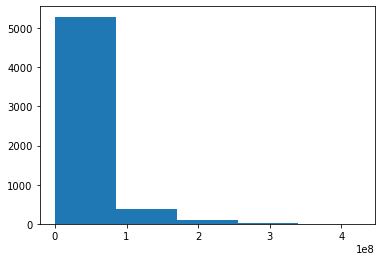

In [138]:
plt.hist(movie_budgets['production_budget'],bins =5);#how to put fig siz..most of production range in 2500000

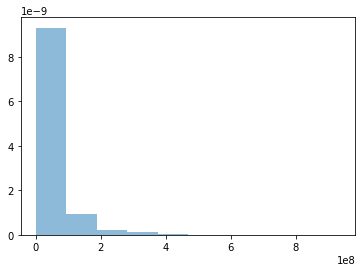

In [146]:
plt.hist(movie_budgets['domestic_gross'],bins =10, density = True,alpha =0.5)#DENSITY TO SHOW THE TRANSPARENCY OF THE GRAPH;

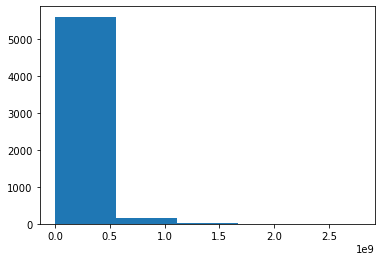

In [143]:
plt.hist(movie_budgets['worldwide_gross'],bins =5);

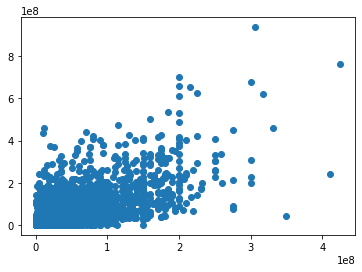

In [149]:
    plt.scatter(movie_budgets['production_budget'],movie_budgets['domestic_gross'])

### correlation

In [155]:
correlation_pr_dm = round(movie_budgets['production_budget'].corr(movie_budgets['domestic_gross']),4)*100
print("The correlation between production budget and domestic revenue is :", correlation_pr_dm,"%")

The correlation between production budget and domestic revenue is : 68.57 %


In [156]:
correlation_pr_ww = round(movie_budgets['production_budget'].corr(movie_budgets['worldwide_gross']), 4)*100
print("The correlation between production budget and worldwide revenue is :", correlation_pr_ww, "%")

The correlation between production budget and worldwide revenue is : 74.83 %


In [153]:
movie_budgets['production_budget'].corr(movie_budgets['worldwide_gross'])

0.7483059765694747

# im.db
##reading im database
here we going to be dealinh with im database

In [ ]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("im.db")

In [171]:
movie_basic_data = pd.read_sql("""SELECT *
FROM movie_basics"""
            ,conn)
movie_basic_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [180]:
movie_basic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [181]:
movie_basic_data.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [175]:
movie_ratings_data = pd.read_sql("""SELECT *
FROM movie_ratings;""",conn)
movie_ratings_data

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [177]:
movie_ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [179]:
movie_ratings_data.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

# Connect movie basic with movie ratings

In [52]:
movie_database = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING(movie_id);""",conn)

In [53]:
movie_database

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [182]:
movie_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


# Data cleaning in im.db


In [68]:
movie_database.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [70]:
movie_database.duplicated().value_counts()

False    73856
dtype: int64

In [184]:
movie_database['genres'].mode()[0]

'Drama'

In [185]:
movie_database['genres'].value_counts()

Drama                       11612
Documentary                 10313
Comedy                       5613
Horror                       2692
Comedy,Drama                 2617
                            ...  
Biography,Drama,News            1
Comedy,Music,War                1
Horror,Music,Mystery            1
Animation,Family,Sci-Fi         1
Adventure,Horror,Western        1
Name: genres, Length: 923, dtype: int64

In [ ]:
we replace the missing values in the genre with the most-occuring genre(drama)

In [186]:
mode_movie_database = movie_database['genres'].mode()[0]
movie_database['genres'].fillna('mode_movie_database',inplace = True)


In [188]:
movie_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [189]:
movie_database.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres                0
averagerating         0
numvotes              0
dtype: int64

In [190]:
mean_movie_database = movie_database['runtime_minutes'].mean()
movie_database['runtime_minutes'].fillna('mean_movie_database',inplace = True)

In [191]:
 movie_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  object 
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 4.5+ MB


In [192]:
 movie_database.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

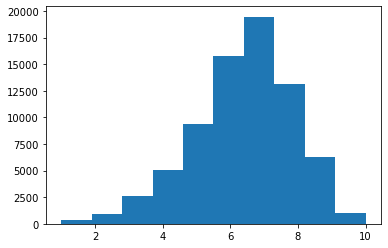

In [194]:
plt.hist(movie_database['averagerating'], bins = 10);


# Data cleaning in  rt.reviews.tsv

In [54]:
movie_reviews = pd.read_csv("rt.reviews.tsv",delimiter='\t', encoding = 'latin-1')
movie_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [169]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [69]:
movie_reviews.isna().sum()


id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64